In [23]:
%reset
%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cmocean
import glob
import os
import math

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import pop_tools
from scipy.optimize import curve_fit

In [2]:
grid = pop_tools.get_grid('POP_gx1v7')[['TAREA', 'KMT', 'TLAT', 'TLONG', 'REGION_MASK']]

In [3]:
def process(da):
    
    da['ALK_excess'] = da.ALK - da.ALK_ALT_CO2
    da['DIC_excess'] = da.DIC - da.DIC_ALT_CO2
    da['pCO2_SURF_excess'] = da.pCO2SURF - da.pCO2SURF_ALT_CO2
    
    return da

Read data

In [4]:
%%time

location  = 'North_Pacific_basin' #North_Atlantic_basin or North_Pacific_basin
polygon = '064'                    #for Atlantic: 0, 16, 36, 63; for Pacific: 105, 155; also 51, 64, 184, 185

# 1 year continuous release:
fpath = f'/glade/campaign/cesm/development/bgcwg/projects/OAE-Global-Efficiency/Elizabeth_IRF_Experiments/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1year/ocn/hist/'
da_1yr = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1year.pop.h.*.nc')
print(da_1yr)

# 5 year continuous release:
fpath = f'/glade/campaign/cesm/development/bgcwg/projects/OAE-Global-Efficiency/Elizabeth_IRF_Experiments/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-5year/ocn/hist/'
da_5yr = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-5year.pop.h.*.nc')
print(da_5yr)


<xarray.Dataset>
Dimensions:                     (d2: 2, nlat: 384, nlon: 320, time: 240, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * time                        (time) object 0347-02-01 00:00:00 ... 0367-01...
  * z_t                         (z_t) float32 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                    (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                         (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                     (z_w_top) float32 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_bot                     (z_w_bot) float32 1e+03 2e+03 ... 5.5e+05
    ULONG                       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                        (nlat, nlon) float64 dask.array

In [5]:
#Month-long release for each month:
fpath = f'/glade/campaign/cesm/development/bgcwg/projects/OAE-Global-Efficiency/Mengyang_Global_OAE_Experiments/archive/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-01/ocn/hist/'
da_01 = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-01.pop.h.*.nc')
print(da_01)

fpath = f'/glade/campaign/cesm/development/bgcwg/projects/OAE-Global-Efficiency/Mengyang_Global_OAE_Experiments/archive/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-04/ocn/hist/'
da_04 = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-04.pop.h.*.nc')
print(da_04)

fpath = f'/glade/campaign/cesm/development/bgcwg/projects/OAE-Global-Efficiency/Mengyang_Global_OAE_Experiments/archive/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-07/ocn/hist/'
da_07 = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-07.pop.h.*.nc')
print(da_07)

#Month-long release for each month:
fpath = f'/glade/campaign/cesm/development/bgcwg/projects/OAE-Global-Efficiency/Mengyang_Global_OAE_Experiments/archive/smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-10/ocn/hist/'
da_10 = xr.open_mfdataset(fpath + f'smyle-fosi.{location}.alk-forcing-{location}.{polygon}-1999-10.pop.h.*.nc')
print(da_10)

<xarray.Dataset>
Dimensions:                     (d2: 2, nlat: 384, nlon: 320, time: 180, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
  * time                        (time) object 0347-02-01 00:00:00 ... 0362-01...
  * z_t                         (z_t) float32 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                    (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                         (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                     (z_w_top) float32 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_bot                     (z_w_bot) float32 1e+03 2e+03 ... 5.5e+05
    ULONG                       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                        (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                       (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT                        (nlat, nlon) float64 dask.array

In [11]:
print('done')

done


In [12]:
da_1yr = process(da_1yr)
da_5yr = process(da_5yr)

da_01 = process(da_01)
da_04 = process(da_04)
da_07 = process(da_07)
da_10 = process(da_10)

In [13]:
def excess_dic(da):
    dic_inv = ((da.DIC - da.DIC_ALT_CO2) * da.dz * da.TAREA).sum(['z_t', 'nlat', 'nlon']) * 1e-9
    dic_inv = dic_inv.compute()
    return dic_inv

In [14]:
#Still need to multiply this by the number of days in total (since we're summing over months that have unequal day numbers)
def cal_added_ALk(da):
    '''Total added ALK, in mol'''
    ALk_added_total = (da.ALK_FLUX * da.TAREA).sum(['nlat', 'nlon']).cumsum(['time'])*1e-9*86400 # mol/day for that one month
    return ALk_added_total.values

In [15]:
total_exc_alk_1yr = (cal_added_ALk(da_1yr)*365/12)
total_exc_alk_5yr = (cal_added_ALk(da_5yr)*365/12)
total_exc_alk_01  = (cal_added_ALk(da_01)*31)
total_exc_alk_04  = (cal_added_ALk(da_04)*30)
total_exc_alk_07  = (cal_added_ALk(da_07)*31)
total_exc_alk_10  = (cal_added_ALk(da_10)*31)

exc_dic_1yr = excess_dic(da_1yr)
exc_dic_5yr = excess_dic(da_5yr)
exc_dic_01  = excess_dic(da_01)
exc_dic_04  = excess_dic(da_04)
exc_dic_07  = excess_dic(da_07)
exc_dic_10  = excess_dic(da_10)

ALk_added_1yr = (da_1yr.ALK_FLUX * da_1yr.TAREA).sum(['nlat', 'nlon'])*1e-9*86400  # mol/day
ALk_added_5yr = (da_5yr.ALK_FLUX * da_5yr.TAREA).sum(['nlat', 'nlon'])*1e-9*86400  # mol/day 
ALk_added_01 =  (da_01.ALK_FLUX  * da_01.TAREA).sum(['nlat', 'nlon'])*1e-9*86400   
ALk_added_04 =  (da_04.ALK_FLUX  * da_04.TAREA).sum(['nlat', 'nlon'])*1e-9*86400  
ALk_added_07 =  (da_07.ALK_FLUX  * da_07.TAREA).sum(['nlat', 'nlon'])*1e-9*86400 
ALk_added_10 =  (da_10.ALK_FLUX  * da_10.TAREA).sum(['nlat', 'nlon'])*1e-9*86400  

print((exc_dic_1yr/total_exc_alk_1yr)[-1])
print((exc_dic_5yr/total_exc_alk_5yr)[-1])

<xarray.DataArray ()>
array(0.78397773)
Coordinates:
    time     object 0367-01-01 00:00:00
<xarray.DataArray ()>
array(0.77634425)
Coordinates:
    time     object 0367-01-01 00:00:00


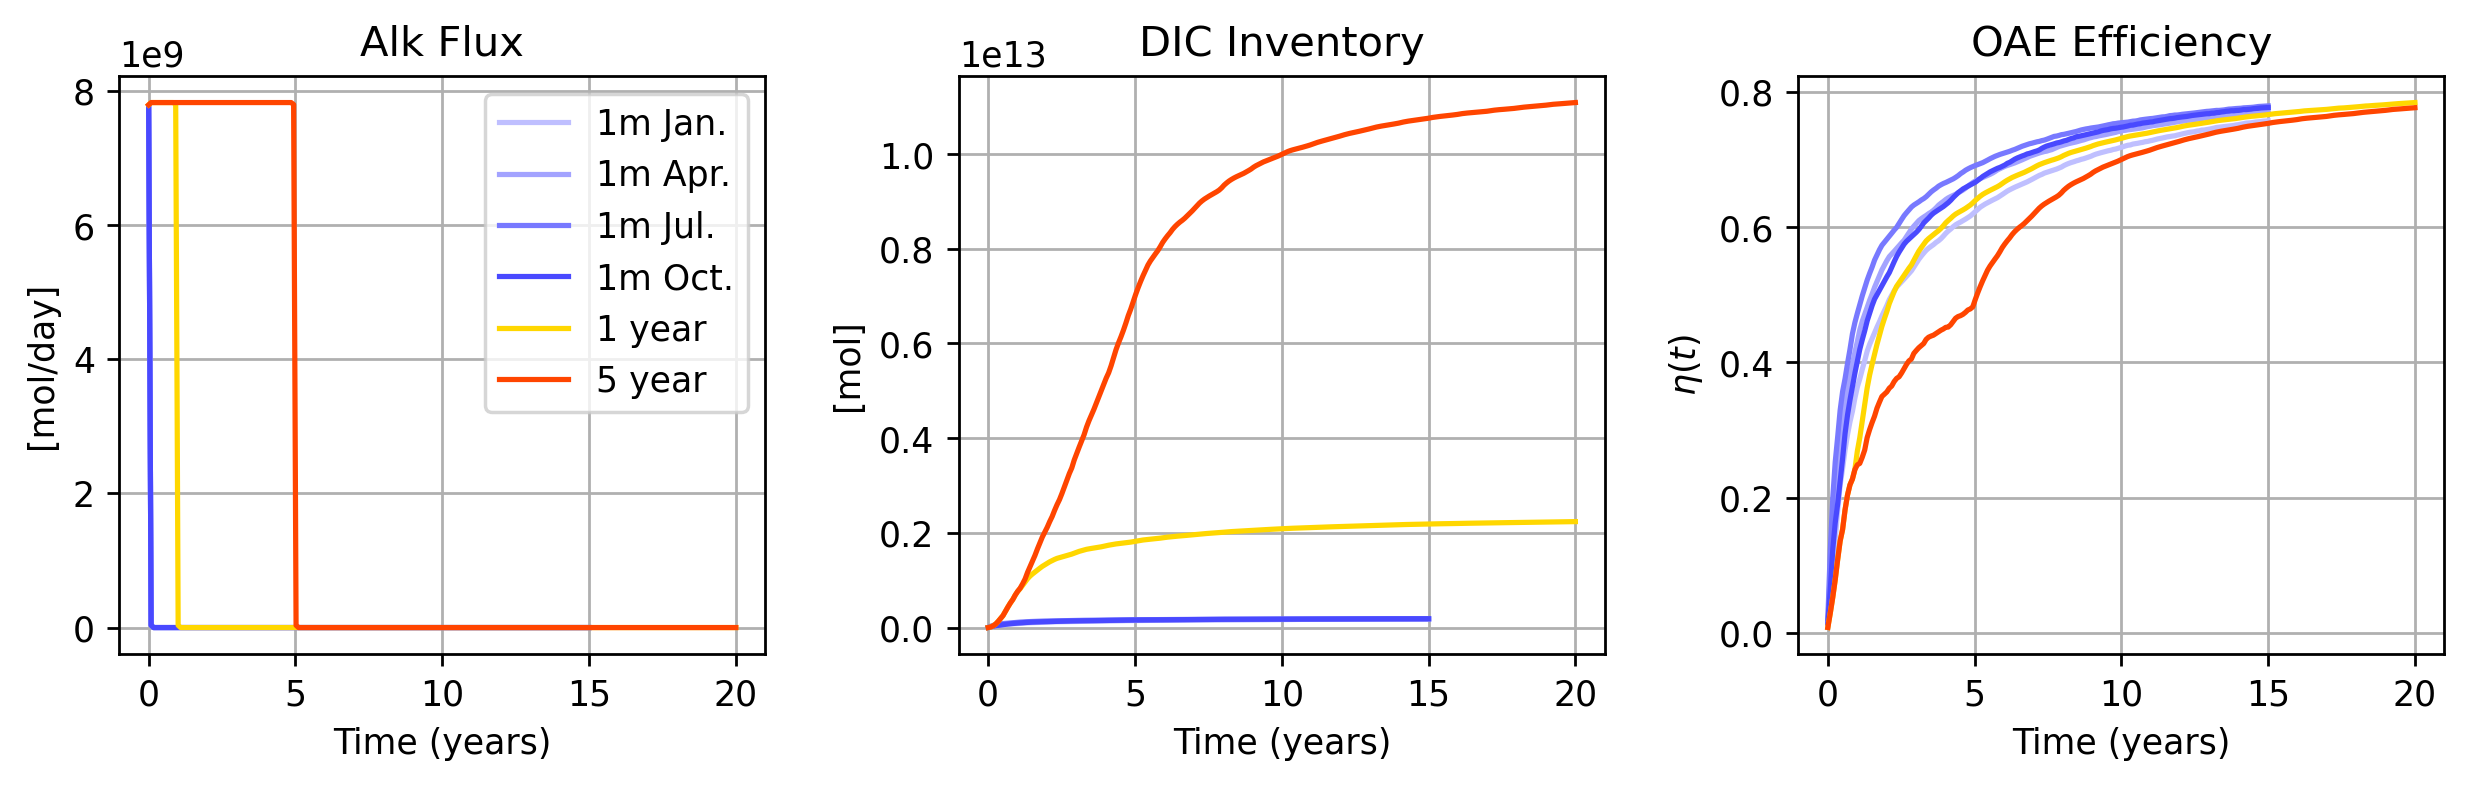

In [16]:
fig = plt.figure(figsize=(12,3),dpi=250)
ax = fig.add_subplot(131)
ax.plot(np.linspace(0,15,180), ALk_added_01.values, c='#BFBFFF', label='1m Jan.')
ax.plot(np.linspace(0,15,180), ALk_added_04.values, c='#A3A3FF', label='1m Apr.')
ax.plot(np.linspace(0,15,180), ALk_added_07.values, c='#7879FF', label='1m Jul.')
ax.plot(np.linspace(0,15,180), ALk_added_10.values, c='#4949FF', label='1m Oct.')

ax.plot(np.linspace(0,20,240), ALk_added_1yr.values, label='1 year', c = 'gold')
ax.plot(np.linspace(0,20,240), ALk_added_5yr.values, label='5 year', c = 'orangered')

ax.set_title('Alk Flux')
ax.set_ylabel('[mol/day]')
ax.set_xlabel('Time (years)')

ax1 = fig.add_subplot(132)
ax1.plot(np.linspace(0,15,180), exc_dic_01, c='#BFBFFF', label='1m Jan.')
ax1.plot(np.linspace(0,15,180), exc_dic_04, c='#A3A3FF', label='1m Apr.')
ax1.plot(np.linspace(0,15,180), exc_dic_07, c='#7879FF', label='1m Jul.')
ax1.plot(np.linspace(0,15,180), exc_dic_10, c='#4949FF', label='1m Oct.')

ax1.plot(np.linspace(0,20,240), exc_dic_1yr, c = 'gold', label='1 year')
ax1.plot(np.linspace(0,20,240), exc_dic_5yr, c = 'orangered', label='5 year')

ax1.set_ylabel('[mol]')
ax1.set_xlabel('Time (years)')
ax1.set_title('DIC Inventory')

ax2 = fig.add_subplot(133)
#exc_dic_01.time
ax2.plot(np.linspace(0,15,180), exc_dic_01/total_exc_alk_01, c='#BFBFFF', label='1m Jan.')
ax2.plot(np.linspace(0,15,180), exc_dic_04/total_exc_alk_04, c='#A3A3FF', label='1m Apr.')
ax2.plot(np.linspace(0,15,180), exc_dic_07/total_exc_alk_07, c='#7879FF', label='1m Jul.')
ax2.plot(np.linspace(0,15,180), exc_dic_10/total_exc_alk_10, c='#4949FF', label='1m Oct.')

ax2.plot(np.linspace(0,20,240), exc_dic_1yr/total_exc_alk_1yr, c = 'gold', label='1 year')
ax2.plot(np.linspace(0,20,240), exc_dic_5yr/total_exc_alk_5yr, c = 'orangered', label='5 year')

ax2.set_ylabel('$\eta(t)$')
ax2.set_xlabel('Time (years)')
ax2.set_title('OAE Efficiency')



ax.legend();  ax.grid();
#ax1.legend(); 
ax1.grid();
#ax2.legend(); 
ax2.grid();

plt.subplots_adjust(wspace=0.3)

In [17]:
def plot(da, tstep):
    
        fig = plt.figure(figsize=(7,6.5),dpi=250)

        ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=-120))
        ax.stock_img()
        ax.coastlines(linewidth=0.5, color='blue', resolution='110m')


        sca = ax.pcolormesh(grid.TLONG,
                      grid.TLAT,
                      da.isel(time=tstep, z_t=0).ALK_excess, vmin=0,vmax=0.04*60,
                      transform=ccrs.PlateCarree(),
                      cmap=cmocean.cm.dense);  
        cb = fig.colorbar(sca, ax=ax, shrink=0.74)

        cb.ax.set_title('meq/m$^3$') 


        ax.set_extent([-130, 30, -50, 80], ccrs.PlateCarree(central_longitude=-120)) #originally -110 limit
        ax.set_xticks(np.arange(-130, 30, 20), crs=ccrs.PlateCarree(central_longitude=-120))
        ax.set_yticks(np.arange(-50, 80, 10), crs=ccrs.PlateCarree(central_longitude=-120))
        lon_formatter = LongitudeFormatter(zero_direction_label=False)
        lat_formatter = LatitudeFormatter()
        ax.xaxis.set_major_formatter(lon_formatter)
        ax.yaxis.set_major_formatter(lat_formatter)  

        ax.stock_img()
        ax.add_feature(cfeature.LAND, facecolor='lightgray')

        ax.grid()


Text(0.5, 1.0, '5 Year Release: Surface $\\mathrm{\\Delta Alk}$ After 15 Years')

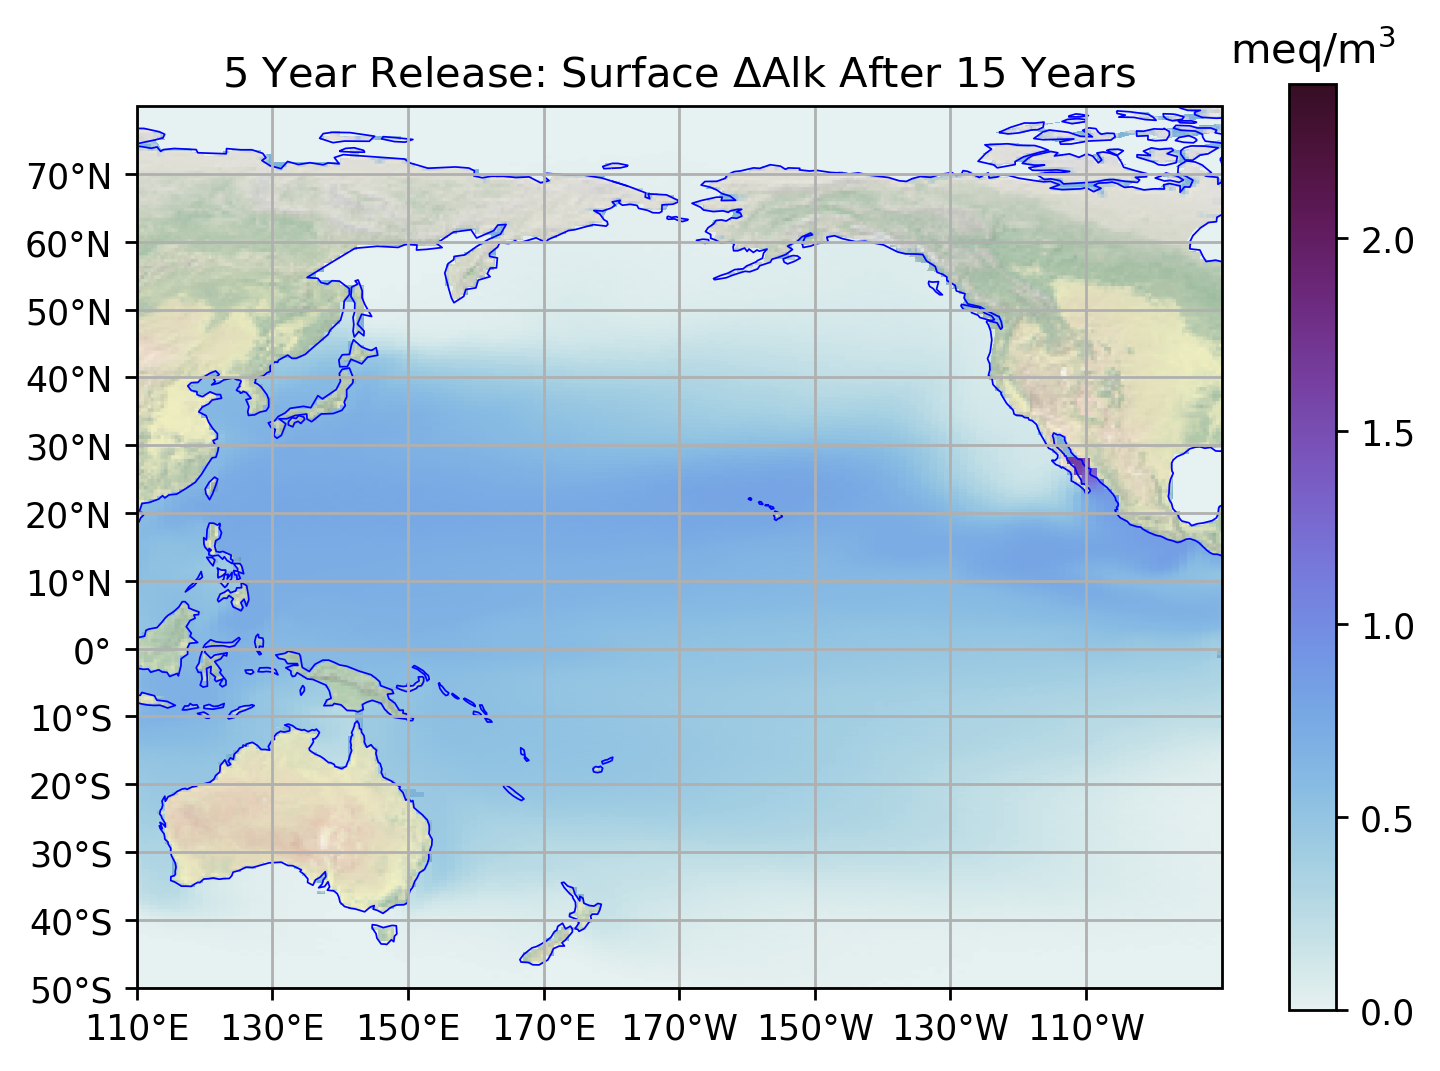

In [18]:
plot(da_5yr, 239)
plt.title('5 Year Release: Surface $\mathrm{\Delta Alk}$ After 15 Years')

In [19]:
def exponential_tau(t, eta_max, ktau, gtau, htau):
    '''
    t: time
    eta_max: initial condition (this doubles as intrinsic "max" efficiency, ~0.81)
    ktau: e-folding time of gas exchange
    gtau: e-folding time of loss to the deep
    htau: e-folding time of gas exchange for the deep reservoir
    '''
    alpha = gtau/(ktau+gtau)
    tau_kg = 1.0/(1/ktau+1/gtau)
    return eta_max * (1 -  alpha*np.exp(-(1/ktau+1/gtau)*t)
                         - (1-alpha)*np.exp(-t/htau)
                         - (1-alpha)*(tau_kg/(htau - tau_kg))*(np.exp(-t/htau) - np.exp(-t/tau_kg))
                    )


def fit_params_tau(x_data, y_data, bounds=None, initial=None, pink=None, ping=None, pinh=None):
    '''Return fitted parameters'''
    # Perform the curve fitting
    if bounds is None:
        #bounds=[[ 0.849,  1.96,   0,       0],
        #        [ 0.851,  1.98,  2000,  10000]]
        bounds=[[ 0.80,  2,    0,       5],
                [ 0.88, 50 ,  2000,  10000]]
    if initial is None:
       initial = [(bounds[0][0]+bounds[1][0])/2,
                   np.clip(4,bounds[0][1],bounds[1][1]),
                   np.clip(25,bounds[0][2],bounds[1][2]),
                   np.clip(70,bounds[0][3],bounds[1][3])]
    if pink is not None:
      bounds[0][1] = pink
      bounds[1][1] = pink+0.01
      initial[1] = pink
    if ping is not None:
      bounds[0][2] = ping
      bounds[1][2] = ping+0.01
      initial[2] = ping
    if pinh is not None:
      bounds[0][3] = pinh
      bounds[1][3] = pinh+0.01
      initial[3] = pinh

    popt, pcov = curve_fit(exponential_tau, x_data, y_data, p0=initial,
                           method='trf', maxfev=10000, bounds=bounds)

    stdev = np.sqrt(np.diag(pcov))
    return popt

In [20]:
def fit_to_curve_tau(x_data, y_data, s, show=False, onlydata=False, *args, **kwargs):
 
  if  len(y_data)<=1: # but abort if there's no data
    return np.nan,np.nan,np.nan,np.nan

  eta_max, ktau, gtau, htau = fit_params_tau(x_data, y_data, *args, **kwargs)
  if show:
    if onlydata:
      plt.plot(x_data, y_data)
    else:
      plt.plot(x_data, y_data, c="black",ls="dashed", label=None)
      plt.plot(x_data, exponential_tau(x_data, eta_max, ktau, gtau, htau), c = ["#BFBFFF","#A3A3FF","#7879FF","#4949FF"][s],
             label = r"%s: eta=%.2f t$_{gas}$=%.1fm t$_{loss}$=%.1fm,  t$_{slow}$=%.1fm"%(["Jan","Apr","Jul","Oct"][s],eta_max, ktau, gtau, htau))

    plt.legend(loc='lower right')
  return eta_max, ktau, gtau, htau

(0.0, 190.0)

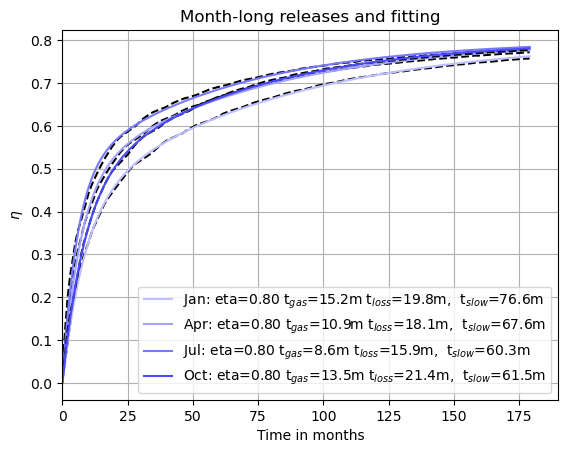

In [21]:

x_data = np.array(range(15*12))  # time in months

y_data_01 = (exc_dic_01/total_exc_alk_01).values; y_data_01 = y_data_01[~np.isnan(y_data_01)]  # get rid of nans
y_data_04 = (exc_dic_04/total_exc_alk_04).values; y_data_04 = y_data_04[~np.isnan(y_data_04)]  # get rid of nans
y_data_07 = (exc_dic_07/total_exc_alk_07).values; y_data_07 = y_data_07[~np.isnan(y_data_07)]  # get rid of nans
y_data_10 = (exc_dic_10/total_exc_alk_10).values; y_data_10 = y_data_10[~np.isnan(y_data_10)]  # get rid of nans

[eta_max_01, ktau_01, gtau_01, htau_01] = fit_to_curve_tau(x_data,y_data_01,0,show=True)
[eta_max_04, ktau_04, gtau_04, htau_04] = fit_to_curve_tau(x_data,y_data_04,1,show=True)
[eta_max_07, ktau_07, gtau_07, htau_07] = fit_to_curve_tau(x_data,y_data_07,2,show=True)
[eta_max_10, ktau_10, gtau_10, htau_10] = fit_to_curve_tau(x_data,y_data_10,3,show=True)

#plt.plot(t,test1,'--r')
#plt.plot(t,test2,'--y')
#plt.plot(convolution/np.nansum(ALk_added_total),'y')
plt.ylabel('$\eta$')
plt.xlabel('Time in months')
plt.title('Month-long releases and fitting')
#plt.plot([0, 190],[0.85,0.85])
plt.grid('on')
plt.xlim([0,190])
#plt.ylim([.0,.9])

In [57]:
t = np.array(range(20*12))

nyears = 5 #maximum length for OAE release

IRF_lib = pd.DataFrame(np.empty(shape=[len(t), 13]) * np.nan)

#Populating IRFs for January, April, July, and October:
IRF_lib[0] = exponential_tau(t, eta_max_01, ktau_01, gtau_01, htau_01)
IRF_lib[3] = exponential_tau(t, eta_max_04, ktau_04, gtau_04, htau_04)
IRF_lib[6] = exponential_tau(t, eta_max_07, ktau_07, gtau_07, htau_07)
IRF_lib[9] = exponential_tau(t, eta_max_10, ktau_10, gtau_10, htau_10)
IRF_lib[12] = exponential_tau(t, eta_max_01, ktau_01, gtau_01, htau_01)


IRF_lib = (IRF_lib.interpolate(axis=1, method="linear")).drop([12], axis=1)
IRF_full = np.transpose(np.tile(np.array(IRF_lib), (1, nyears)))
print(IRF_full.shape)


(60, 240)


([<matplotlib.axis.XTick at 0x14604eed44d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

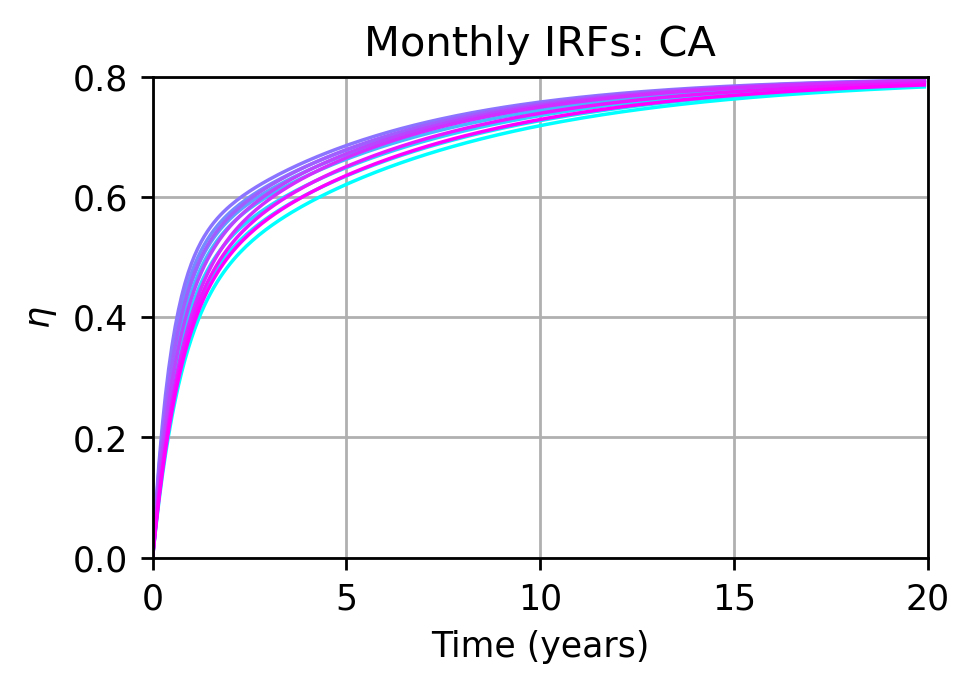

In [67]:
fig = plt.figure(figsize=(4,2.5),dpi=250)

color = iter(plt.cm.cool(np.linspace(0, 1, 12)))

for i in range(1,13):
    c = next(color)
    plt.plot(t/12,IRF_full[i-1],label=f'IRF Month {i:02d}',c=c,linewidth=1)
#plt.legend()
plt.ylabel('$\eta$')
plt.xlabel('Time (years)')
plt.title('Monthly IRFs: CA')
plt.grid('on')
plt.xlim([0,20])
plt.ylim([0,.8])
plt.xticks(np.linspace(0,20,5))

In [65]:
ALk_added_total = ALk_added_1yr*365/12  # mol/month 
convolution_simple1 = np.convolve(ALk_added_total, IRF_full[0])

ALk_added_local = np.zeros(ALk_added_total.shape); ALk_added_local[0]=ALk_added_total[0]
convolution1    = np.zeros(ALk_added_total.shape);
for i in range(0,12):
    convolution_local = np.convolve(ALk_added_local, IRF_full[i])
    convolution1[i:240] = convolution1[i:240] + convolution_local[0:240-i]


In [54]:
ALk_added_total = ALk_added_5yr*365/12  # mol/month 
convolution_simple5 = np.convolve(ALk_added_total, IRF_lib[0])

ALk_added_local = np.zeros(ALk_added_total.shape); ALk_added_local[0]=ALk_added_total[0]
convolution5    = np.zeros(ALk_added_total.shape);
for i in range(0,60):
    convolution_local = np.convolve(ALk_added_local, IRF_full[i])
    convolution5[i:240] = convolution5[i:240] + convolution_local[0:240-i]


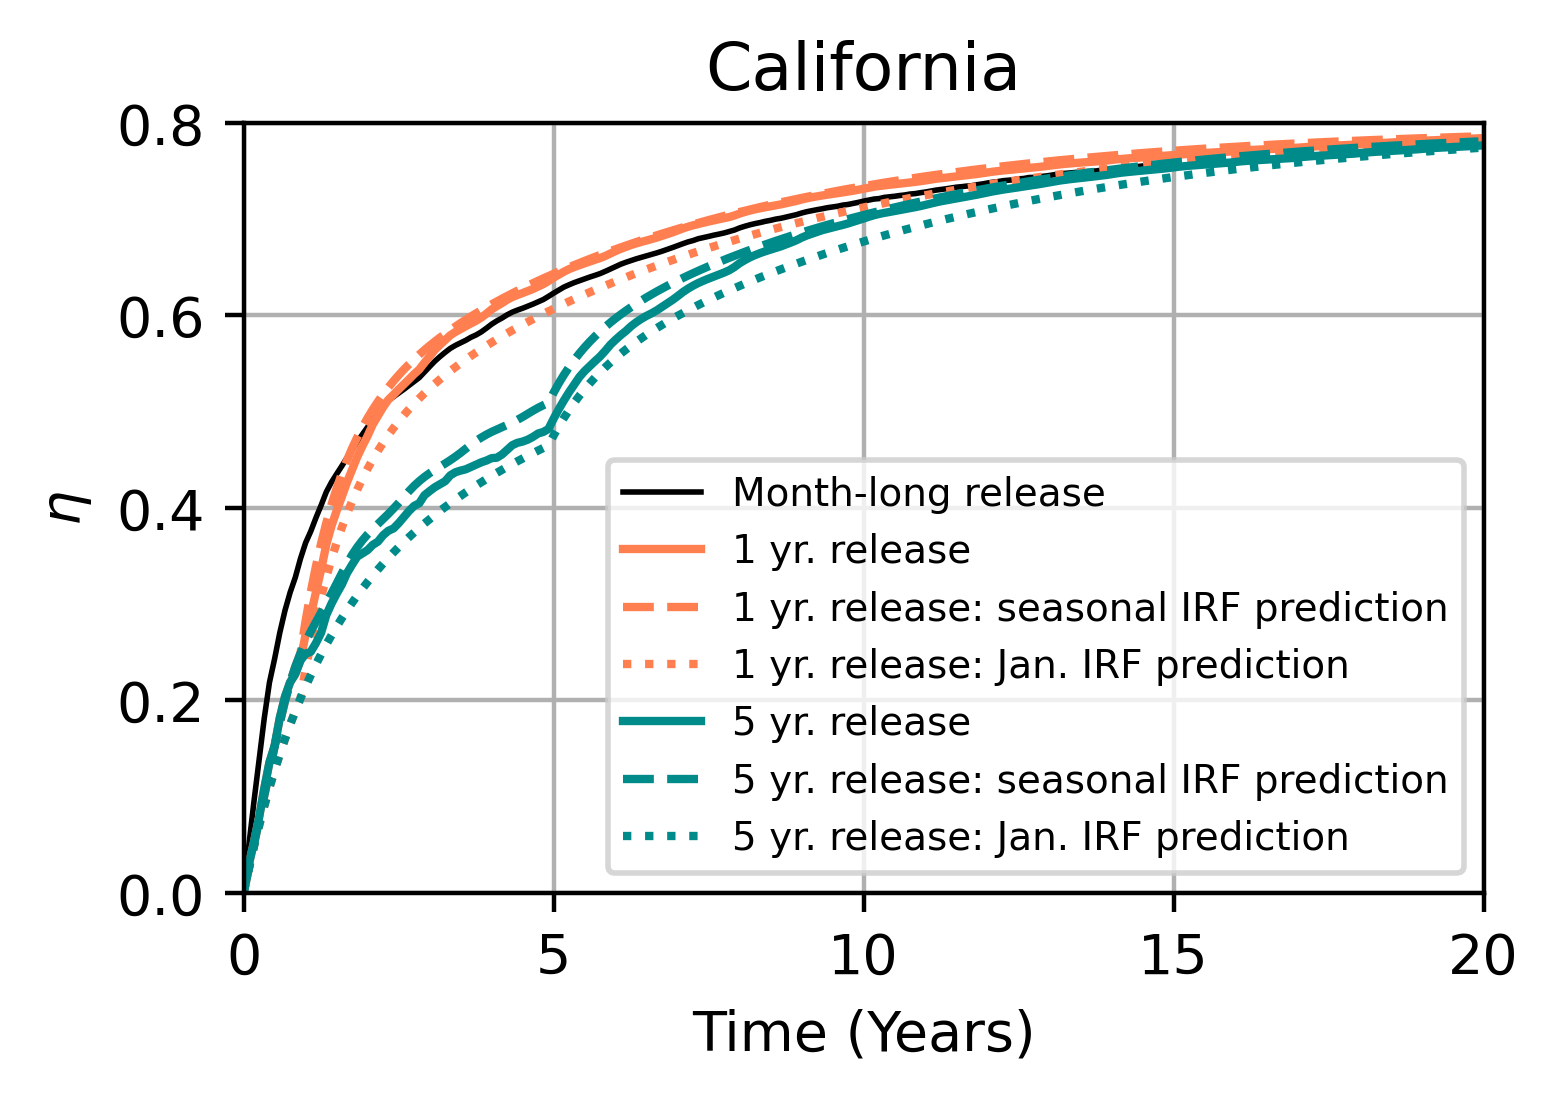

In [64]:
fig = plt.figure(figsize=(4,2.5),dpi=400)

x_data = np.array(range(20*12))/12  # time in months
y_data = (exc_dic_1yr/total_exc_alk_1yr).values
y_data = y_data[~np.isnan(y_data)]  # get rid of nans

plt.plot(x_data[0:180], (exc_dic_01/total_exc_alk_01),c = 'k',label='Month-long release',linewidth=1)

plt.plot(x_data, y_data,c='coral',label='1 yr. release',linewidth=1.5)
plt.plot(x_data,convolution1/total_exc_alk_1yr,'--',c='coral',label='1 yr. release: seasonal IRF prediction',linewidth=1.5)
plt.plot(x_data,convolution_simple1[0:240]/total_exc_alk_1yr,':',c='coral',label='1 yr. release: Jan. IRF prediction',linewidth=1.5)

y_data = (exc_dic_5yr/total_exc_alk_5yr).values
y_data = y_data[~np.isnan(y_data)]  # get rid of nans

plt.plot(x_data, y_data,c='darkcyan',label='5 yr. release',linewidth=1.5)
plt.plot(x_data,convolution5/total_exc_alk_5yr,'--',c='darkcyan',label='5 yr. release: seasonal IRF prediction',linewidth=1.5)
plt.plot(x_data,convolution_simple5[0:240]/total_exc_alk_5yr,':',c='darkcyan',label='5 yr. release: Jan. IRF prediction',linewidth=1.5)


plt.ylabel('$\eta$')
plt.xlabel('Time (Years)')
plt.title('California')
plt.grid('on')
plt.xlim([0,20])
plt.ylim([.0,.8])
plt.xticks(np.linspace(0,20,5))
plt.legend(loc='lower right',fontsize=7)